<a href="https://colab.research.google.com/github/Fefeupz/data_analysis/blob/main/Titanic_predicts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"feital07","key":"1175357ad4a6790aa695b2637a6be672"}'}

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!kaggle competitions download -c titanic


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 53.4MB/s]


In [4]:
import zipfile

# Descompactando o arquivo
with zipfile.ZipFile('/content/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Carregar os dados com Pandas
import pandas as pd
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Visualizando os dados
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
import pandas as pd
import numpy as np

#Carregando o dataset Titanic
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

#Exibir as 5 primeiras linhdas
train_data.head()

#Verificar os tipos de dados e valores ausentes
train_data.info()

#Verificar se existem valores ausentes
train_data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Análise exploratória de Dados (EDA)

Distribuição das variáveis

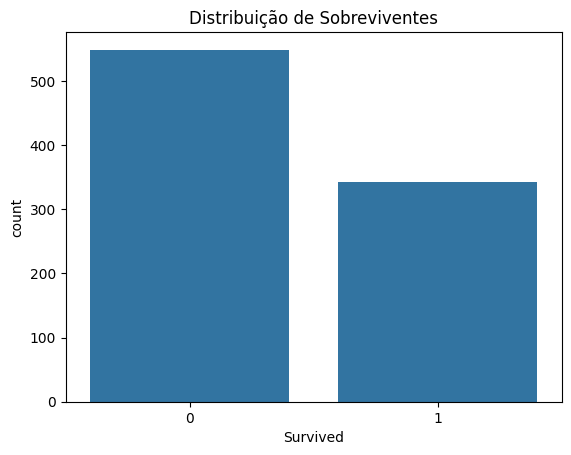

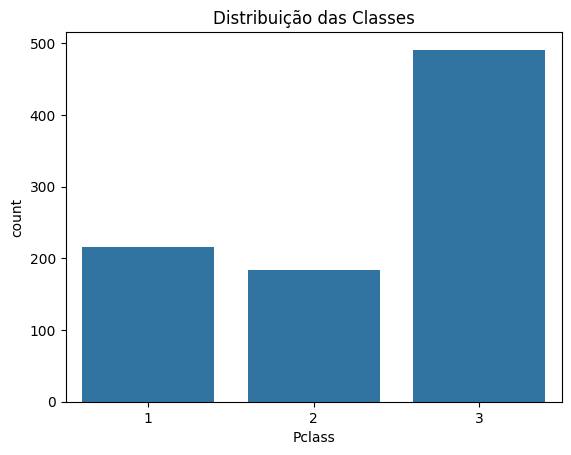

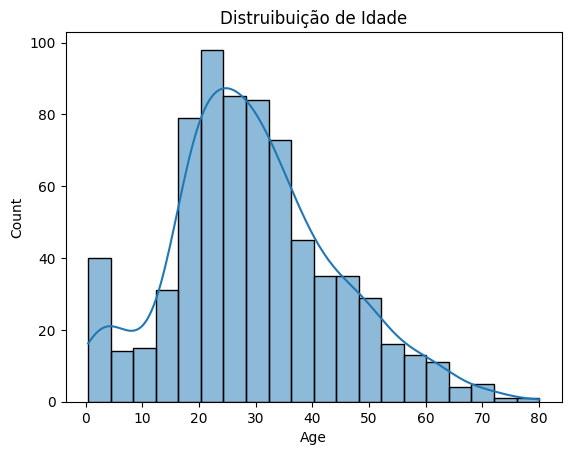

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribuição de sobreviventes
sns.countplot(x='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes')
plt.show()

#Distribuição das classses de cabine
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribuição das Classes')
plt.show()

#Distribuição de Idade
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title("Distruibuição de Idade")
plt.show()

Relações entre Variáveis


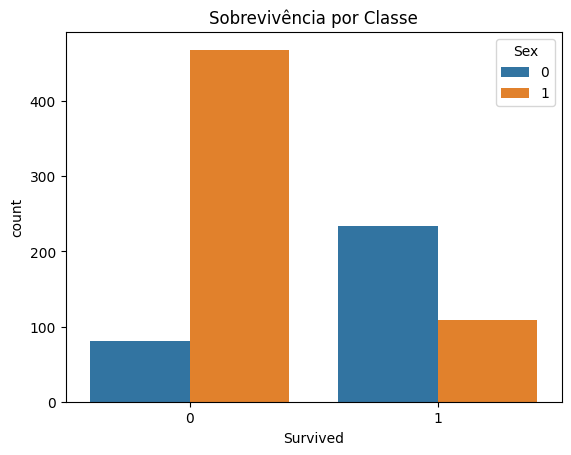

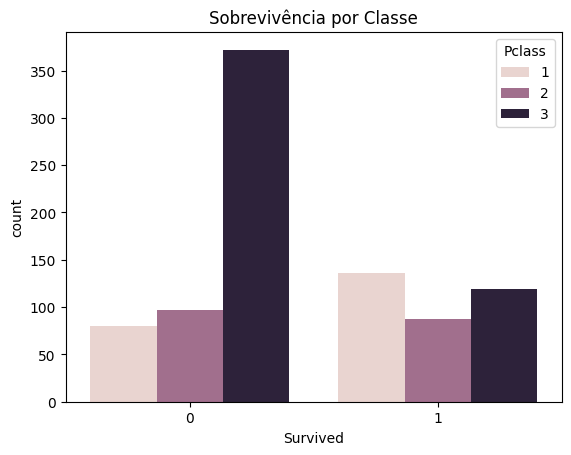

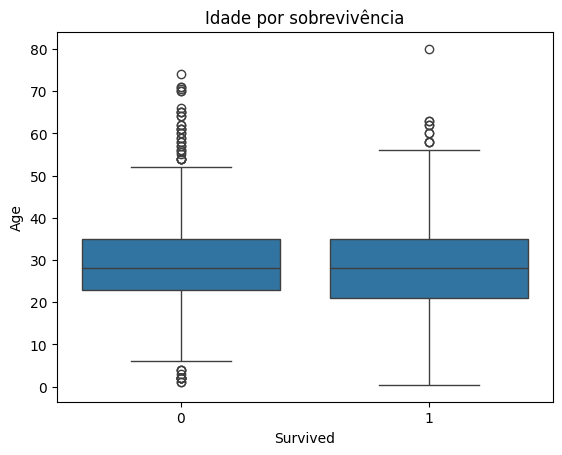

In [25]:
# Relação entre sexo e sobrevivência
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Sobrevivência por Classe')
plt.show()

# Relação entre classe e sobrevivência
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Sobrevivência por Classe')
plt.show()

# Relação entre idade e sobrevivência
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Idade por sobrevivência')
plt.show()

Pré-processamento de dados

In [15]:
#Preencher valores ausentes da coluna 'Age' com a mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

#Preencher valores ausentes da coluna 'Embarked' com o valor mais frequente
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

#Verificar se ainda existem valores ausentes
train_data.isnull().sum()

<ipython-input-15-91d145f12c30>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-15-91d145f12c30>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
#Converter variáveis categóricas
train_data['Sex'] = train_data['Sex'].map({'female':0, 'male':1})

#Convertendo a variável 'Embarked' para numérica
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

#Verificando a transformação
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [17]:
#criando uma nova coluna 'IsAlone' (se o passageiro estava sozinho)
train_data['IsAlone'] = (train_data['SibSp'] + train_data['Parch'] == 0).astype(int)

#verificando a transformação
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1


In [18]:
#Variáveis independentes (features)
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'IsAlone']]

#variável dependente (target)
y = train_data['Survived']

Dividindo em treinamento e teste

In [19]:
from sklearn.model_selection import train_test_split

#dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#treinamento do modelo
from sklearn.tree import DecisionTreeClassifier

#criar o modelo
model = DecisionTreeClassifier(random_state=42)

#treinar o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
#Avaliação do modelo

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Fazer previsões
y_pred = model.predict(X_test)

#Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')

#Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão:\n{conf_matrix}')

# Relatório de classificação
print(f'Relatório de classificação:\n{classification_report(y_test, y_pred)}')

Acurácia: 0.7821
Matriz de confusão:
[[84 21]
 [18 56]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



Visualições avançadas

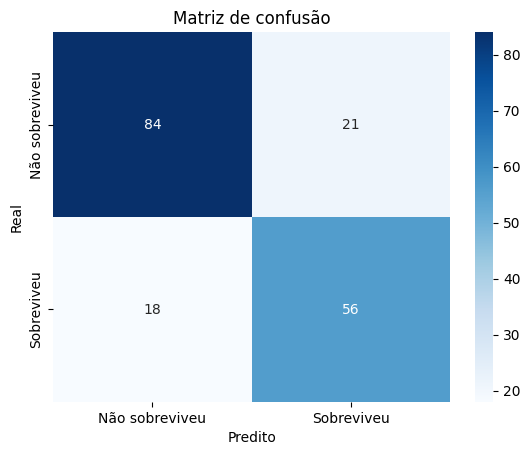

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não sobreviveu', 'Sobreviveu'], yticklabels=['Não sobreviveu', 'Sobreviveu'])
plt.title('Matriz de confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

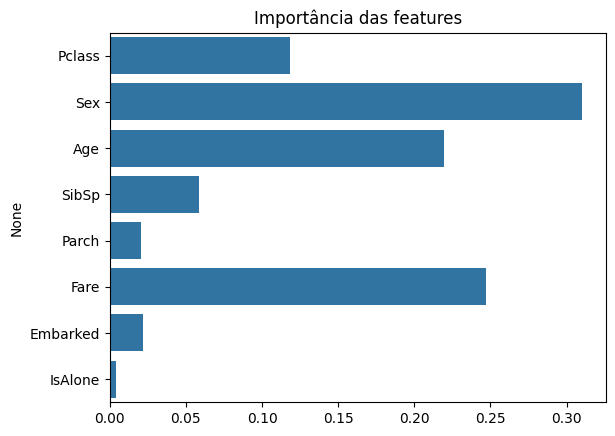

In [23]:
#Visualizando as importâncias das features
features = X.columns
importances = model.feature_importances_

#Plotando a importância das features
sns.barplot (x = importances, y=features)
plt.title('Importância das features')
plt.show()